# CSCI B500 - Basics of **Dynamic Visualizations** for Data Science
* In this unit, we make things “come alive” with _dynamic visualizations_. 

### The Law of Large Numbers
* For a six-sided die, each value 1 through 6 should occur one-sixth of the time, so the probability of any one of these values occurring is 1/6th or about 16.667%.  
* In the dynamic visualization, the more rolls we perform, the closer each die value’s percentage of the total rolls gets to 16.667% and the heights of the bars gradually become about the same. 
* This is a manifestation of the _law of large numbers_. 

## How Dynamic Visualization Works 
* The Matplotlib **`animation`** module’s **`FuncAnimation`** function, updates a visualization _dynamically_. 

### Animation Frames
* `FuncAnimation` drives a **frame-by-frame animation**. 
* Each **animation frame** specifies what to change during one plot update. 
* Stringing together many updates over time creates an animation. 
* This example displays an animation frame every 33 milliseconds—yielding approximately 30 (1000 / 33) frames-per-second. 

### Running `dierolling_dynamicviz.py` from the command line
1. Access the command line in Jupyter with **File > New > Terminal** (or just launch an Anaconda prompt separately)
2. If necessary, use `cd` to navigate to the folder that contains `dierolling_dynamicviz.py`
3. Execute

>```
ipython dierolling_dynamicviz.py 6000 1
```

>* 6000 is the number of animation frames to display.
>* 1 is the number of die rolls to summarize in each animation frame.


* To see the law of large numbers in action, **increase the execution speed** by rolling the die more times per animation frame: 

```python
ipython dierolling_dynamicviz.py 10000 600
```

*  In this case, `FuncAnimation` perform 10,000 updates, with 600 rolls-per-frame, for a total of 6,000,000 rolls. 

### Sample Executions

![Screen capture showing the graph after 64 of 6000 total die rolls](dynamicviz_images/Animation_01.png "Screen capture showing the graph after 64 of 6000 total die rolls")

![Screen capture showing the graph after 604 of the 6000 total die rolls](dynamicviz_images/Animation_02.png "Screen capture showing the graph after 604 of 6000 total die rolls")

![Screen capture showing the graph after 7200 of the 6,000,000 total die rolls](dynamicviz_images/Animation_03.png "Screen capture showing the graph after 7200 of the 6,000,000 total die rolls")

![Screen capture showing the graph after 166,200 of the 6,000,000 total die rolls](dynamicviz_images/Animation_04.png "Screen capture showing the graph after 166,200 of the 6,000,000 total die rolls")

## Implementing a Dynamic Visualization 

### Importing the Matplotlib `animation` Module
* We focus primarily on the new features used in this example. 
* We import the Matplotlib `animation` module to access `FuncAnimation`.

```python 
# dierolling_dynamicviz.py
"""Dynamically graphing frequencies of die rolls."""
from matplotlib import animation
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import sys
```

### Function `update`
```python
def update(frame_number, rolls, faces, frequencies):
    """Configures bar plot contents for each animation frame."""

```
* `FuncAnimation` calls the `update` function once per animation frame. 
>* See more about `FuncAnimation` here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation
* This function must receive at least one argument. 
* Parameters:
    * `frame_number`—The next value from `FuncAnimation`’s `frames` argument, which we’ll discuss momentarily. Though `FuncAnimation` requires the `update` function to have this parameter, we do not use it in this `update` function.
    * `rolls`—The number of die rolls per animation frame.
    * `faces`—The die face values used as labels along the graph’s _x_-axis.
    * `frequencies`—The list in which we summarize the die frequencies.

We discuss the rest of the function’s body below.


### Function `update`: Rolling the Die and Updating the `frequencies` List
* Roll the die `rolls` times and increment the appropriate `frequencies` element for each roll. 
> _(**Question:** when determining the index of `frequencies` whose element will be incremented, why call randrange(1, 7) and subtract 1? What purpose does this serve?)_

```python
    # roll die and update frequencies
    for i in range(rolls):
        frequencies[random.randrange(1, 7) - 1] += 1 
```

### Function `update`: Configuring the Bar Plot and Text 
* The `matplotlib.pyplot` module’s **`cla`** (clear axes) function removes the existing bar plot elements before drawing new ones for the current animation frame. 
* We discussed the other code below when we previously discussed static visualization.

```python
    # reconfigure plot for updated die frequencies
    plt.cla()  # clear old contents contents of current Figure
    axes = sns.barplot(faces, frequencies, palette='bright')  # new bars
    axes.set_title(f'Die Frequencies for {sum(frequencies):,} Rolls')
    axes.set(xlabel='Die Value', ylabel='Frequency')  
    axes.set_ylim(top=max(frequencies) * 1.10)  # scale y-axis by 10%

    # display frequency & percentage above each patch (bar)
    for bar, frequency in zip(axes.patches, frequencies):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        text = f'{frequency:,}\n{frequency / sum(frequencies):.3%}'
        axes.text(text_x, text_y, text, ha='center', va='bottom')

```

### Variables Used to Configure the Graph and Maintain State
* The `sys` module’s `argv` list contains the script’s command-line arguments. 
* The `matplotlib.pyplot` module’s **`figure`** function gets a `Figure` object in which `FuncAnimation` displays the animation &mdash; one of `FuncAnimation`’s required arguments. 

```python
# read command-line arguments for number of frames and rolls per frame
number_of_frames = int(sys.argv[1])  
rolls_per_frame = int(sys.argv[2])  
# note: the argument at 0 is the name of the file itself

sns.set_style('whitegrid')  # white background with gray grid lines
figure = plt.figure('Rolling a Six-Sided Die')  # Figure for animation
values = list(range(1, 7))  # die faces for display on x-axis
frequencies = [0] * 6  # six-element list of die frequencies
```

### Calling the `animation` Module’s `FuncAnimation` Function
* `FuncAnimation` returns an object representing the animation. 
* Though this is not used explicitly, you _must_ store the reference to the animation in a variable (such as `die_animation` in the example below); otherwise, Python immediately terminates the animation and returns its memory to the system. 

```python
# configure and start animation that calls function update
die_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames=number_of_frames, interval=33,
    fargs=(rolls_per_frame, values, frequencies))

plt.show()  # display window

```

`FuncAnimation` has two required arguments:
* `figure`—the `Figure` object in which to display the animation, and
* `update`—the function to call once per animation frame.

* Optional keyword arguments:
    * **`repeat`**—If `True` (the default), when the animation completes it restarts from the beginning.
    * **`frames`**—The total number of animation frames, which controls how many times `FunctAnimation` calls `update`. 
    * **`interval`**—The number of milliseconds between animation frames (the default is 200).
    * **`fargs`** (short for “function arguments”)—A tuple of other arguments to pass to the function you specified in `FuncAnimation`’s second argument. 
* [`FuncAnimation`’s other optional arguments](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html)


------                 

In [1]:
%matplotlib inline

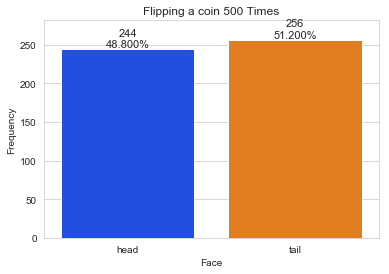

In [3]:
run coin_flipping_staticviz.py 500 # flip it 500 times

In [7]:
%matplotlib qt # we can't use this yet, don't have the permission to run animations
run coin_flipping_dynamicviz.py 50 1

SyntaxError: invalid syntax (<ipython-input-7-b267fd5f8e37>, line 2)